# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.21.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [5]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

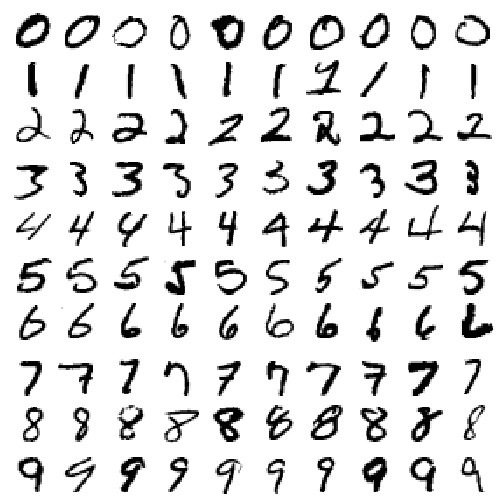

In [8]:
def P1(num_examples):   
  row_images = []
  pixel = 28
  images = [instance.reshape(pixel, pixel) for instance in train_data]

  for i in range(num_examples):
    a = np.where(train_labels==str(i))[0]
    img = []
    for j in range(num_examples):
      img.append(train_data[a[j]].reshape(pixel,pixel))
    row_images.append(np.concatenate(img, axis=1))  

  final_image = np.concatenate(row_images, axis=0)
  plt.figure(figsize=(9,9))
  plt.imshow(final_image, cmap = plt.cm.binary)
  plt.axis("off")
  plt.show()

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [9]:
def P2(k_values):
  for k in k_values:
      clf = KNeighborsClassifier(n_neighbors=k)
      clf.fit(mini_train_data, mini_train_labels)
      preds = clf.predict(dev_data)
      correct, total = 0, 0
      for pred, label in zip(preds, dev_labels):
          if pred == label: correct += 1
          total += 1
      print('k: %3d, total: %3d, correct: %3d  accuracy: %3.5f' %(k, total, correct, clf.score(dev_data, dev_labels)))
      if k==1:
        cr = classification_report(dev_labels,preds)
  print('Classification report with k=1: \n',cr)    


k_values = [1, 3, 5, 7, 9]
P2(k_values)

k:   1, total: 1000, correct: 877  accuracy: 0.87700
k:   3, total: 1000, correct: 874  accuracy: 0.87400
k:   5, total: 1000, correct: 878  accuracy: 0.87800
k:   7, total: 1000, correct: 868  accuracy: 0.86800
k:   9, total: 1000, correct: 861  accuracy: 0.86100
Classification report with k=1: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.85      0.97      0.91       114
           2       0.93      0.84      0.88        97
           3       0.88      0.81      0.84       106
           4       0.89      0.87      0.88       100
           5       0.82      0.90      0.86        92
           6       0.95      0.95      0.95        99
           7       0.84      0.87      0.85        97
           8       0.90      0.80      0.85        93
           9       0.81      0.81      0.81        98

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      10

ANSWER:


*   We can see from above results that accuracy is highest with k=1 at 88.4% and lowest with k=9 at 87.5%
*   According to the classification report, the digit most difficult for the k-nearest neighbor model to recognize is the digit 9



### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Train size: 100, total time (sec): 0.282, accuracy: 0.67
Train size: 200, total time (sec): 0.413, accuracy: 0.79
Train size: 400, total time (sec): 0.885, accuracy: 0.83
Train size: 800, total time (sec): 1.703, accuracy: 0.86
Train size: 1600, total time (sec): 3.229, accuracy: 0.90
Train size: 3200, total time (sec): 6.412, accuracy: 0.91
Train size: 6400, total time (sec): 13.249, accuracy: 0.94
Train size: 12800, total time (sec): 29.161, accuracy: 0.95
Train size: 25600, total time (sec): 55.277, accuracy: 0.96


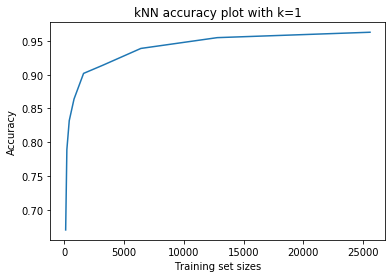

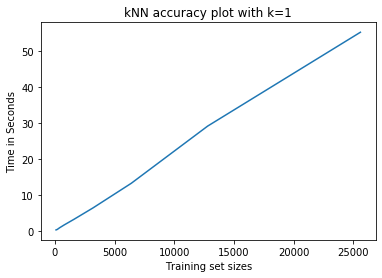

In [10]:
def P3(train_sizes, accuracies):
  train_times = []
  for sizes in train_sizes:
      exp_train_data, exp_train_labels = X[:sizes], Y[:sizes]
      knn = KNeighborsClassifier(n_neighbors=1)
      knn.fit(exp_train_data, exp_train_labels)
      begintime = time.time()
      score = knn.score(dev_data, dev_labels)
      endtime = time.time()
      correct, total = 0, 0
      accuracies.append(score)
      train_times.append(endtime - begintime)
      print('Train size: %3d, total time (sec): %3.3f, accuracy: %3.2f' %(sizes, endtime - begintime, score))
  
  plt.plot(train_sizes, accuracies)
  plt.title('kNN accuracy plot with k=1')
  plt.xlabel('Training set sizes')
  plt.ylabel('Accuracy')
  plt.show()

  plt.plot(train_sizes, train_times)
  plt.title('kNN accuracy plot with k=1')
  plt.xlabel('Training set sizes')
  plt.ylabel('Time in Seconds')
  plt.show()

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

No handles with labels found to put in legend.


untransformed accuracies: [0.67  0.789 0.832 0.864 0.902 0.914 0.939 0.955 0.963]
Initial untransformed coefficient of determination: 0.3937574746297682


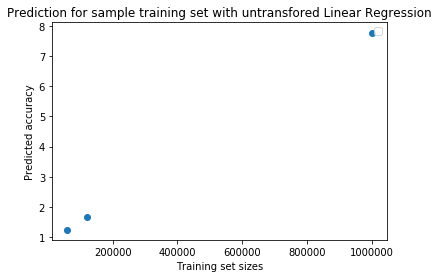

transformed accuracies: [ 2.03030303  3.73933649  4.95238095  6.35294118  9.20408163 10.62790698
 15.39344262 21.22222222 26.02702703]
Transformed linear regression --- coefficient of determination: 0.9227614178944142


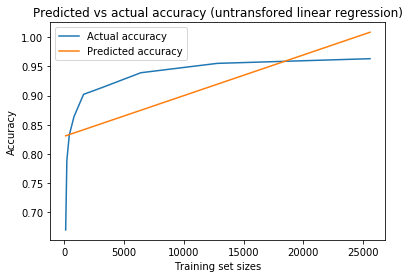

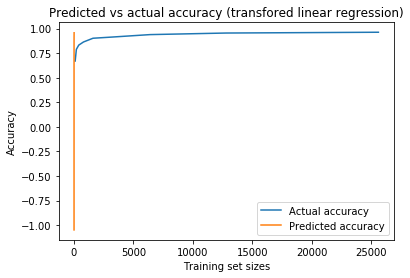

In [11]:
def P4():

  #sample training set size
  test_data_sizes = np.array([60000, 120000, 1000000]).reshape((-1, 1))

  #Fitting initial data from P3 and printing debugging values and R2
  x = np.array(train_sizes).reshape((-1, 1))
  y = np.array(accuracies)
  linreg = LinearRegression()
  linreg.fit(x, y)
  r2 = linreg.score(x, y)
  linpreds = linreg.predict(test_data_sizes)
  print("untransformed accuracies:", y)
  print('Initial untransformed coefficient of determination:', r2)
  plt.scatter(test_data_sizes, linpreds)
  plt.xlabel('Training set sizes')
  plt.ylabel('Predicted accuracy')
  plt.title('Prediction for sample training set with untransfored Linear Regression')
  plt.legend()
  plt.show()

  #Creating linear regression with transformed variables 
  x_tran = np.log(np.array(train_sizes).reshape((-1, 1)))
  y_tran = y / (1-y)
  print("transformed accuracies:", y_tran)
  linreg_tran = LinearRegression()
  linreg_tran.fit(x_tran, y_tran)
  r2_tran = linreg_tran.score(x_tran, y_tran)
  print('Transformed linear regression --- coefficient of determination:', r2_tran)
  linpreds_tran = linreg_tran.predict(test_data_sizes)

  #Plotting graphs 
  #Predicted vs actual accuracy for untransformed linear regression
  plt.plot(train_sizes, accuracies, label='Actual accuracy')
  plt.plot(train_sizes, linreg.predict(x), label='Predicted accuracy')
  plt.xlabel('Training set sizes')
  plt.ylabel('Accuracy')
  plt.title('Predicted vs actual accuracy (untransfored linear regression)')
  plt.legend()
  plt.show()

  #Predicted vs actual accuracy for transformed linear regression
  plt.plot(train_sizes, accuracies, label='Actual accuracy')
  y_tran_preds = [e/(e+1) for e in linreg_tran.predict(x_tran) ]
  plt.plot(x_tran, y_tran_preds , label='Predicted accuracy')
  plt.xlabel('Training set sizes')
  plt.ylabel('Accuracy')
  plt.title('Predicted vs actual accuracy (transfored linear regression)')
  plt.legend()
  plt.show()


P4()

ANSWER:

Initial untransformed linear regression R^2 is 0.4177.
The issue with using linear regression to predict accuracies is that: 


*   accuracies and training set sizes are not in linear relation with each other 
*   Our predicted training set sizes are much larger than our train set sizes -- which causes results to get under or over-skewed



### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[ 98   0   0   0   0   3   2   0   1   0]
 [  0 111   0   0   1   0   1   1   0   0]
 [  2   6  81   2   0   1   1   2   1   1]
 [  0   2   3  86   0   6   0   3   3   3]
 [  0   3   0   0  87   0   0   1   0   9]
 [  2   0   0   2   1  83   1   2   1   0]
 [  1   2   0   0   0   1  94   0   1   0]
 [  2   4   0   1   3   0   0  84   0   3]
 [  0   2   2   4   0   7   0   1  74   3]
 [  2   0   1   3   6   0   0   6   1  79]]

Confusion matrix tells us that the most confused image is 9 (which is mistaken for 4)
Some examples of misclassified images


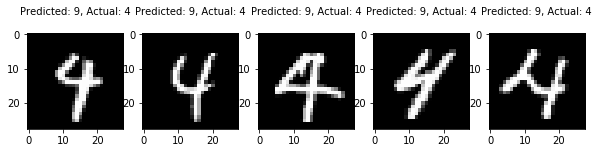

In [12]:
def P5():

  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(mini_train_data, mini_train_labels)
  preds = clf.predict(dev_data)
  wrong_labels = []
  misclassifiedIndexes = []

  correct, total = 0, 0
  for pred, label in zip(preds, dev_labels):
      if pred == label: correct += 1
      else: 
          wrong_labels.append((pred, label))
          if (label=='4' and pred=='9'):
            misclassifiedIndexes.append(total)
      total += 1

  print(confusion_matrix(dev_labels, preds))
  print("\nConfusion matrix tells us that the most confused image is 9 (which is mistaken for 4)")
  print("Some examples of misclassified images")

  plt.figure(figsize=(10,4))
  for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(dev_data[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}\n'.format(preds[badIndex], dev_labels[badIndex]), fontsize = 10)

P5()

ANSWER: 

As per confusion matrix, largest number of misclassified images are those of the digit 4, that the model confuses as 9

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

blur wt: 0 , accuracy:  0.877 (no blur on train or dev data)
blur wt: 0 , accuracy:  0.904 (blur on train, not dev data)
blur wt: 0 , accuracy:  0.877 (no blur on train, blur dev data)
blur wt: 0 , accuracy:  0.896 (blur on train and dev data)
blur wt: 0.1 , accuracy:  0.877 (no blur on train or dev data)
blur wt: 0.1 , accuracy:  0.903 (blur on train, not dev data)
blur wt: 0.1 , accuracy:  0.874 (no blur on train, blur dev data)
blur wt: 0.1 , accuracy:  0.892 (blur on train and dev data)
blur wt: 0.5 , accuracy:  0.877 (no blur on train or dev data)
blur wt: 0.5 , accuracy:  0.899 (blur on train, not dev data)
blur wt: 0.5 , accuracy:  0.872 (no blur on train, blur dev data)
blur wt: 0.5 , accuracy:  0.898 (blur on train and dev data)
blur wt: 0.6 , accuracy:  0.877 (no blur on train or dev data)
blur wt: 0.6 , accuracy:  0.897 (blur on train, not dev data)
blur wt: 0.6 , accuracy:  0.874 (no blur on train, blur dev data)
blur wt: 0.6 , accuracy:  0.898 (blur on train and dev data)


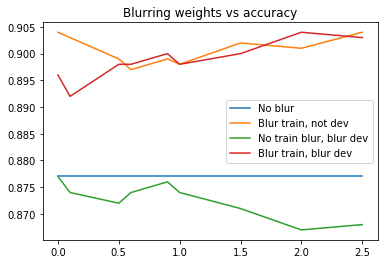

In [13]:
def neighbors(mat, row, col, radius=1):
    """
    implementation for finding neighbors for a given cell in a given N * M matrix
    The edge cells are not included
    """
    rows, cols = len(mat), len(mat[0])
    out = []
    for i in range(row - radius - 1, row + radius):
        for j in range(col - radius - 1, col + radius):
            if 0 <= i < rows and 0 <= j < cols:
                out.append(mat[i][j])
            else:
                None
    return out


def blur(new_img, blur_weight):
  final_wt = []
  img = np.reshape(new_img, (28, 28)) #accept the incoming image matrix and reshape it from [784,] to [28, 28] then unravel it again for convering into 2-d array
  img = img.ravel()
  new_img = img.copy()
  new_img = new_img.reshape(28,28)
  copied_img = np.zeros(new_img.shape)
  for r in range(len(new_img)):
    for c in range(len(new_img)):
      temp = neighbors(new_img, r+1, c+1) #invoke the neigbor algo above to recursively find all cells and their neighbors and then take their averages
      copied_img[r][c] = np.average(temp, weights=[1]*(len(temp)-1) + [blur_weight])
  return copied_img.flatten()


def p6():

  blur_weights = [0, 0.1, 0.5, 0.6, 0.9, 1, 1.5, 2, 2.5]
  acc_no_blur = []
  acc_blur_training_not_dev = []
  acc_not_training_blur_dev = []
  acc_blur_training_blur_dev = []

  for wt in blur_weights:
    knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn1.fit(mini_train_data, mini_train_labels)
    score1 = knn1.score(dev_data, dev_labels)
    print('blur wt:', wt, ', accuracy: ', score1 , '(no blur on train or dev data)')
    acc_no_blur.append(score1)

    blurred_train_data = [blur(dt, wt) for dt in mini_train_data]
    blurred_dev_data = [blur(dt, wt) for dt in dev_data]

    knn2 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn2.fit(blurred_train_data, mini_train_labels)
    score2 = knn2.score(dev_data, dev_labels)
    print('blur wt:', wt, ', accuracy: ', score2, '(blur on train, not dev data)')
    acc_blur_training_not_dev.append(score2)

    knn3 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn3.fit(mini_train_data, mini_train_labels)
    score3 = knn3.score(blurred_dev_data, dev_labels)
    print('blur wt:', wt, ', accuracy: ', score3, '(no blur on train, blur dev data)')
    acc_not_training_blur_dev.append(score3)

    knn4 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn4.fit(blurred_train_data, mini_train_labels)
    score4 = knn4.score(blurred_dev_data, dev_labels)
    print('blur wt:', wt, ', accuracy: ', score4, '(blur on train and dev data)')
    acc_blur_training_blur_dev.append(score4)

  plt.plot(blur_weights, acc_no_blur, label='No blur')
  plt.plot(blur_weights, acc_blur_training_not_dev, label='Blur train, not dev')
  plt.plot(blur_weights, acc_not_training_blur_dev, label='No train blur, blur dev')
  plt.plot(blur_weights, acc_blur_training_blur_dev, label='Blur train, blur dev')
  plt.legend()
  plt.title('Blurring weights vs accuracy')
  plt.show()

p6()




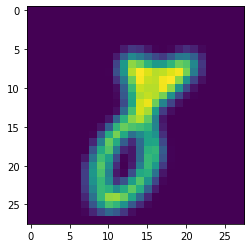

In [15]:
  plt.imshow(blur(mini_train_data[102], 0).reshape((28, 28)))

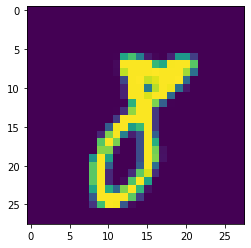

In [16]:
  plt.imshow((mini_train_data[102]).reshape((28, 28)))



### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [17]:
def preprocessing(value):
  if value < 0.1:
    return 0
  elif value < 0.9:
    return 1
  else: 
    return 2

def P7():
  #bernoulli NB
  bernoulliNB = BernoulliNB(binarize=0.1)
  bernoulliNB.fit(mini_train_data, mini_train_labels)
  print("Bernoulli model accuracy:", bernoulliNB.score(dev_data, dev_labels))

  #multinomial NB - preprocessing train data first
  preprocessed_multiNB = []
  for item in mini_train_data:
    for p in item: 
      preprocessed_multiNB.append(preprocessing(p))
  preprocessed_multiNB_nparray = np.array(preprocessed_multiNB).reshape(mini_train_data.shape)


  # Multinomial NB - now preprocessing dev data and the checking the score 
  preprocessed_multiNB_dev_data = []
  for item in dev_data:
    for p in item: 
      preprocessed_multiNB_dev_data.append(preprocessing(p))

  multiNB = MultinomialNB()
  multiNB.fit(preprocessed_multiNB_nparray, mini_train_labels)
  preprocessed_multiNB_dev_nparray = np.array(preprocessed_multiNB_dev_data).reshape(dev_data.shape)

  print("Bernoulli multinomial model accuracy:", multiNB.score(preprocessed_multiNB_dev_nparray, dev_labels))


P7()

Bernoulli model accuracy: 0.82
Bernoulli multinomial model accuracy: 0.794


ANSWER:

The multinomial Naive Bayes model has a lower accuracy score of 0.809 due to overfitting. Since we are confusing it with three different "bands" of white/black/grey (as opposed to clear-distinction/generalized fitting in Bernoulli NB). Hence Bernoulli NB has slightly higher score.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [18]:
def P8(alphas):
    gs_clf = GridSearchCV(BernoulliNB(binarize=0.0), 
                          param_grid=alphas, cv=5, 
                          scoring='accuracy', 
                          return_train_score=True)
    gs_clf.fit(mini_train_data, mini_train_labels)

    cvres = gs_clf.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
      print("Mean test score:", mean_score, params)
    return gs_clf
    
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Mean test score: 0.81 {'alpha': 1e-10}
Mean test score: 0.827 {'alpha': 0.0001}
Mean test score: 0.826 {'alpha': 0.001}
Mean test score: 0.829 {'alpha': 0.01}
Mean test score: 0.826 {'alpha': 0.1}
Mean test score: 0.828 {'alpha': 0.5}
Mean test score: 0.824 {'alpha': 1.0}
Mean test score: 0.82 {'alpha': 2.0}
Mean test score: 0.785 {'alpha': 10.0}

Best alpha =  {'alpha': 0.01}


ANSWER:

Best value for alpha is 0.001 with accuracy being 0.825. 

Accuracy drops with alpha is near-zero (or zero) at 0.81399. We also see accuracy dropping when alpha is very high (~1 or 2). Accuracy swings in extreme alphas (too low or too high) due to underfitting and overfitting.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.


GNB unsmoothed model accuracy: 0.543
*********** unsmoothed theta and sigma ************
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]
 [1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]
 [1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]
 ...
 [1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]
 [1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]
 [1.97230601e-10 1.97230601e-10 1.97230601e-10 ... 1.97230601e-10
  1.97230601e-10 1.97230601e-10]]

GNB smoothed model accuracy: 0.779
*********** smoothed theta and sigma ************
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 

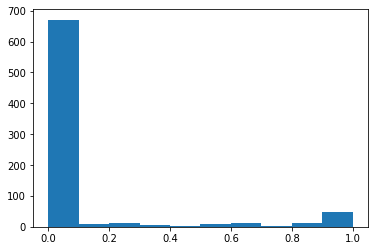

In [19]:
def P9():
  plt.hist(mini_train_data[100])

  model_unsmoothed = GaussianNB()
  model_unsmoothed.fit(mini_train_data, mini_train_labels)
  print("\nGNB unsmoothed model accuracy:", model_unsmoothed.score(dev_data, dev_labels))
  print("*********** unsmoothed theta and sigma ************")
  print(model_unsmoothed.theta_)
  print(model_unsmoothed.sigma_)

  model_smoothed = GaussianNB(var_smoothing=0.062)
  model_smoothed.fit(mini_train_data, mini_train_labels)
  #model_smoothed.sigma_ = 0.1
  print("\nGNB smoothed model accuracy:", model_smoothed.score(dev_data, dev_labels))
  print("*********** smoothed theta and sigma ************")
  print(model_smoothed.theta_)
  print(model_smoothed.sigma_)

P9()

ANSWER: 

We can see in the "unsmoothed" prior model, the standard deviations (as shown by sigmas and thetas) are exceedingly low. This tells us that the model thinks that the largest variance of the data is really low. And hence when it actually encounters data with realistic standard deviation (say 0.2) is doesn't know what to do (in other words, the model has previously overfit the data, and now is throwing all other data as false negatives or positives). 

The second model shows the use of var_smoothing. This changes the maximum standard deviation of the model to a more realistic 0.062 (which better fits the data). And hence our score goes up from 0.592 to 0.82

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

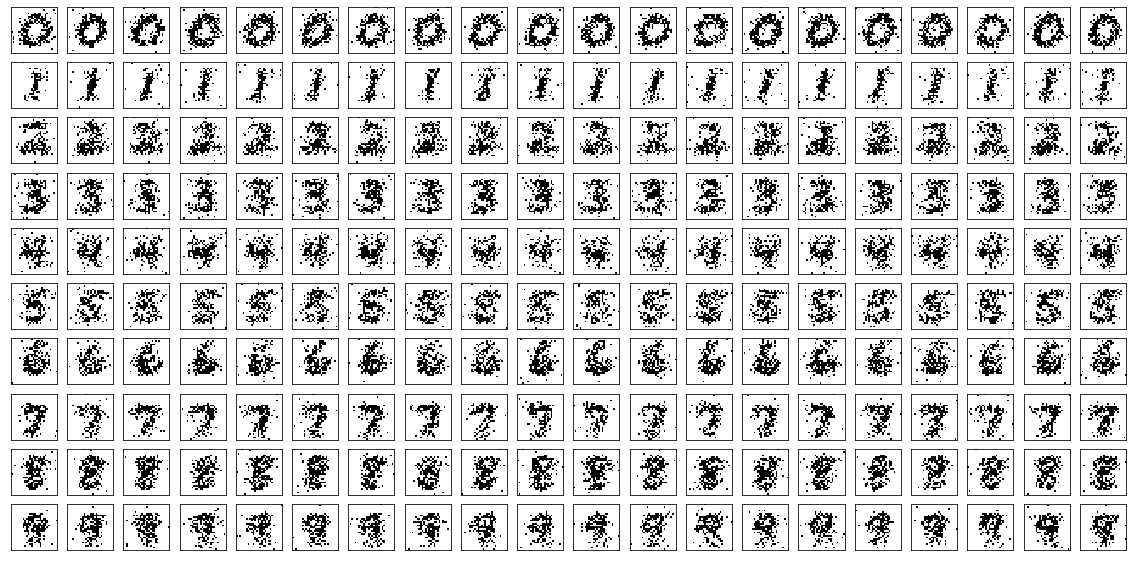

In [20]:
def P10(num_examples):
  nb = BernoulliNB(binarize=0.1).fit(mini_train_data, mini_train_labels)
  fig, ax = plt.subplots(10, num_examples, figsize=(num_examples, 10))
  for i in range(10):
    for j in range(num_examples):
      #Extract prob of feature given class & compare with random num for binarization
      #Binarize the feature probability and then reshape into numpy array for rendering
      img_prob = (np.exp(nb.feature_log_prob_[i]) > np.random.rand(1, 784)).flatten() 
      image_flat_binary = list(map(int, img_prob))  
      img_render = np.reshape(np.asarray(image_flat_binary), (28, 28))
      ax[i, j].imshow(img_render, cmap='binary')
  plt.setp(ax, xticks=(), yticks=())
  plt.show()


P10(20)

ANSWER:

Since the Bernoulli NB takes of each pixel as either 0 or 1 (on or off), hence there is slight scatter in the overall final representation of the final image data. However, given the limitations, the model does perform quite fine -- though the images may not be as good as the actual images (for obvious reasons of limitations of the Bernoulli NB model). 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [21]:
def P11(buckets, correct, total):
  bernoulliNB = BernoulliNB(binarize=0.0, alpha=0.001)
  bernoulliNB.fit(mini_train_data, mini_train_labels)
  preds = bernoulliNB.predict(dev_data)
  yprob = bernoulliNB.predict_proba(dev_data)
  for idx, predicted_label in enumerate(preds):
    for b_idx, bucket in enumerate(buckets):
      if(yprob[idx][int(predicted_label)] <= bucket):
        if(predicted_label==dev_labels[idx]):
          correct[b_idx] +=1
        total[b_idx] +=1
        break
  print('buckets', buckets)
  print('correct buckets', correct)
  print('total buckets', total)
  print('\n')



buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
     accuracy = 0.0
     if (total[i] > 0): accuracy = correct[i] / total[i]
     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

buckets [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct buckets [0, 12, 32, 40, 33, 32, 51, 40, 574]
total buckets [0, 28, 63, 75, 50, 55, 69, 51, 609]


p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  28    accuracy = 0.429
p(pred) is 0.9000000000000 to 0.9990000000000    total =  63    accuracy = 0.508
p(pred) is 0.9990000000000 to 0.9999900000000    total =  75    accuracy = 0.533
p(pred) is 0.9999900000000 to 0.9999999000000    total =  50    accuracy = 0.660
p(pred) is 0.9999999000000 to 0.9999999990000    total =  55    accuracy = 0.582
p(pred) is 0.9999999990000 to 0.9999999999900    total =  69    accuracy = 0.739
p(pred) is 0.9999999999900 to 0.9999999999999    total =  51    accuracy = 0.784
p(pred) is 0.9999999999999 to 1.0000000000000    total = 609    accuracy = 0.943


ANSWER:

This is an interesting case -- the results indicate that even after the prior probability exceeds 90% (after the 3rd bucket 0.90 to 0.9990), the posterior probability still doesn't exceed ~90%. We see that the post probability doesn't move in lockstep with prior probability. Hence going by the definition of "strong calibration" as given in the question ["Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9"], our model doesn't seem to fit that case. 

Hence we have to classify this model as a "weekly calibrated" model. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [22]:
"""
Testing the original model accuracy to establish as a benchmark for improvement. 
"""
nb_original = BernoulliNB()
nb_original.fit(mini_train_data, mini_train_labels)
orig_score = nb_original.score(dev_data, dev_labels)
print('Original model score:', orig_score)

Original model score: 0.813


In [23]:
"""
Basic approach in the algo below:
- Check accuracy score of untransformed data (done above = 0.809) 
- Then create blurred() data (similar to question 6)
- Then created average() of rows and columns
- Add those extra features to the blurred data set to expand on the feature dataset (ensure you take the most optimized blur weight [as shown in problem 6])
- Then train a GridSeacrhCV model for a bunch of alphas and binarized params
- Then find the most optimum values of params
- Train a BaggingClassifier based on those params
- Find the optimized values
Score goes up from 0.807 to 0.837
"""

def neighbors(mat, row, col, radius=1):
    """
    implementation for finding neighbors for a given cell in a given N * M matrix
    The edge cells are not included.
    The function accepts matrix of image and a given cells (row, col) coordinates. The radius=1 means that only immediate neighbors are selected.
    In case of corner and border cells, do not choose the neighbors as 0, since they would impact the overall weightage
    """
    rows, cols = len(mat), len(mat[0])
    out = []
    for i in range(row - radius - 1, row + radius):
        for j in range(col - radius - 1, col + radius):
            if 0 <= i < rows and 0 <= j < cols:
                out.append(mat[i][j])
            else:
                None
    return out


def blur(new_img, blur_weight):
  final_wt = []
  img = np.reshape(new_img, (28, 28)) #accept the incoming image matrix and reshape it from [784,] to [28, 28] then unravel it again for convering into 2-d array
  img = img.ravel()
  new_img = img.copy()
  new_img = new_img.reshape(28,28)
  copied_img = np.zeros(new_img.shape)
  for r in range(len(new_img)):
    for c in range(len(new_img)):
      temp = neighbors(new_img, r+1, c+1) #invoke the neigbor algo above to recursively find all cells and their neighbors and then take their averages
      copied_img[r][c] = np.average(temp, weights=[1]*(len(temp)-1) + [blur_weight])
  return copied_img.flatten()


def mean_cols_row(data):
  image_datum = []
  for image in data:
    img = np.reshape(image, (28, 28))
    mean_col = np.mean(img, axis=0, dtype=np.float64)
    mean_row = np.mean(img, axis=1, dtype=np.float64)
    a = np.concatenate((image, mean_col, mean_row), axis=0)
    image_datum.append(a)
  #print(len(image_datum))
  return image_datum


def CallGridSearchCV(alphas):
  blurred_train_data = [blur(dt, 0.5) for dt in mini_train_data]
  blurred_dev_data = [blur(dt, 0.5) for dt in dev_data]
  gs_clf = GridSearchCV(BernoulliNB(), 
                        param_grid=alphas, cv=5, 
                        scoring='accuracy', 
                        return_train_score=True)
  gs_clf.fit(mean_cols_row(blurred_train_data), mini_train_labels)
  return gs_clf


alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
          'binarize':[1.0e-10, 0.0001, 0.001, 0.01, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
nb = CallGridSearchCV(alphas)
print()
blurred_dev_data = [blur(datum, 0.6) for datum in dev_data]
print("Best alpha = ", nb.best_params_)
print("Grid Search score = ", nb.score(mean_cols_row(blurred_dev_data), dev_labels))

C:\Users\Vaibhav Beohar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Best alpha =  {'alpha': 0.5, 'binarize': 0.4}
Grid Search score =  0.813


In [24]:
def P12():
  from sklearn.ensemble import BaggingClassifier

  blurred_train_data = [blur(datum, 0.6) for datum in mini_train_data]
  blurred_dev_data = [blur(datum, 0.6) for datum in dev_data]

  bag_clf = BaggingClassifier(
      BernoulliNB(binarize=0.3, alpha=0.0001), n_estimators=100,
      bootstrap=True, oob_score=True, random_state=40)#, n_jobs=-1)
  bag_clf.fit(mean_cols_row(blurred_train_data), mini_train_labels)
  
  print('Out of bag score: ', bag_clf.oob_score_)
  bag_score = bag_clf.score(mean_cols_row(blurred_dev_data), dev_labels)
  print('Bagging classifier score: ', bag_score)
  print('Increase of accuracy: ', ((bag_score - orig_score) / orig_score) * 100,'%')

P12()

Out of bag score:  0.838
Bagging classifier score:  0.81
Increase of accuracy:  -0.36900369003688704 %
